In [1]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding,Dense,Bidirectional,LSTM,Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
#IMPORT THE REGULARIZERS
from tensorflow.keras import regularizers
import tensorflow.keras.utils as ku
print("hello")

hello


In [2]:
df=pd.read_csv("G:/hell.csv")
df.drop(df.columns[0], axis=1,inplace=True)
df=df[["text_short","text_long","chosen_emotion"]
]
dt=pd.concat([df["text_short"],df["text_long"]],axis=0)
df.describe()

,text_short,text_long,chosen_emotion
count,2339,2339,2339
unique,2338,2339,8
top,Stay at home,"I feel so anxious, for my family, friends and ...",Anxiety
freq,2,1,1309


In [3]:
token=Tokenizer()
token.fit_on_texts(dt)
total_words=len(token.word_index)+1
input_seq=[]
input_long=[]
for i in df["text_short"]:
    input_seq.append(token.texts_to_sequences([i])[0])
for i in df["text_long"]:
    input_long.append(token.texts_to_sequences([i])[0])
max_len_long=max(len(i) for i in input_long)
input_long=np.array(pad_sequences(input_long,maxlen=int(0.55*max_len_long),padding='pre'))
labels=df["chosen_emotion"]
print(total_words)
print(int(0.6*max_len_long))

uniques,ids=np.unique(labels,return_inverse=True)
y_code=ku.to_categorical(ids,len(uniques))
print(y_code)
print(uniques)
print(ids)
x_train,x_test,y_train,y_test=train_test_split(input_long,y_code,test_size=0.1)

9781
612
[[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
['Anger' 'Anxiety' 'Desire' 'Disgust' 'Fear' 'Happiness' 'Relaxation'
 'Sadness']
[6 1 6 ... 1 1 7]


In [4]:
import pickle
for i in range(6):
    print(input_seq[i])
print(df["text_short"].head(5))
print(token.sequences_to_texts([[659,48,501,45,263,124,1287]])[0])

[659, 4, 21, 460, 3, 252, 27, 32, 18, 105, 366, 889, 5, 200, 229, 12, 85, 10, 67, 321, 38, 256, 292, 422]
[20, 48, 91, 4, 2457, 6, 31, 1287]
[501, 39, 24, 37, 26, 1, 31, 3, 148, 52, 37, 15, 2, 563, 40, 1, 477, 1640, 8, 20, 57, 46, 2, 179, 57, 12, 7, 1641, 46, 1, 1, 1502, 59, 1, 2666, 26, 6, 4059, 59, 63, 4, 589, 177, 90, 416, 3, 2089, 12, 7, 2458, 55, 2, 130, 53, 121]
[45, 523, 45, 88, 263, 27, 35, 7, 191, 905, 29, 1, 174, 2, 279, 25, 22, 44, 154, 13, 34, 171]
[124, 34, 42, 18, 13, 174, 33, 22, 11, 338, 145, 1, 19, 46, 1141, 272, 387, 1729, 545, 63, 53, 37, 12, 2985, 1331]
[88, 264, 18, 1, 174, 33, 218, 1, 76, 3, 43, 122, 83, 347]
0    Fortunate to feel calm and relaxed but worried...
1            Not being able to cuddle my family sucks!
2    Spending time at home with the family and work...
3    I'm OK, I'm feeling positive, but also a littl...
4    Getting very anxious about this whole situatio...
Name: text_short, dtype: object
fortunate being spending i'm positive getting sucks


In [5]:
with open('G:/token_NEWMAIN.pickle','wb') as handle:
    pickle.dump(token,handle,protocol=pickle.HIGHEST_PROTOCOL)
with open('G:/token_NEWMAIN.pickle','rb') as handle:
    tokenizortest=pickle.load(handle)
print(tokenizortest.sequences_to_texts([[659,48,501,45,263,124,1287]])[0])

fortunate being spending i'm positive getting sucks


In [6]:
#SERIALZIED THE MODEL USING LSTM AND BIDRIECTIONAL LSTM
model = Sequential()
model.add(Embedding(total_words, 100, input_length=int(0.55*max_len_long)))
model.add(Bidirectional(LSTM(120, return_sequences = True)))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dense(total_words/3, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dense(8, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())
    

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 561, 100)          978100    
_________________________________________________________________
bidirectional (Bidirectional (None, 561, 240)          212160    
_________________________________________________________________
dropout (Dropout)            (None, 561, 240)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               136400    
_________________________________________________________________
dense (Dense)                (None, 3260)              329260    
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 26088     
Total params: 1,682,008
Trainable params: 1,682,008
Non-trainable params: 0
______________________________________________

In [7]:
history = model.fit(x_train,y_train,validation_split=0.25,epochs=30, verbose=1)

Train on 1578 samples, validate on 527 samples
Epoch 1/30
1578/1578 [==============================] - 142s 90ms/sample - loss: 2.0486 - accuracy: 0.5602 - val_loss: 1.5269 - val_accuracy: 0.5351

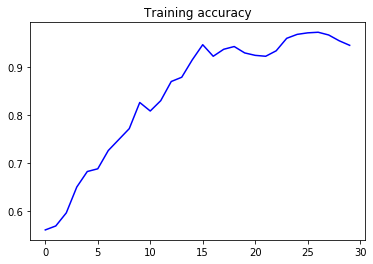

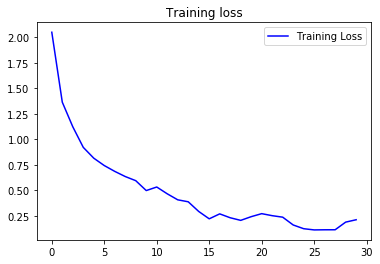

In [8]:
model.save("G:/first_model_feeling1longonly_NEWMAIN.hdf5",include_optimizer=True)
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss = history.history['loss']
epochs = range(len(acc))
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.title('Training accuracy')
plt.figure()
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.title('Training loss')
plt.legend()

plt.show()

In [10]:
from tensorflow.keras.models import load_model
moole=load_model("G:/first_model_feeling1longonly_NEWMAIN.hdf5")
#moole.summary()
dft=pd.read_csv("G:/hell.csv")
dft=dft["text_long"]
input_seq=np.array(pad_sequences(input_seq,maxlen=int(0.55*max_len_long),padding='pre'))
yhat=moole.predict(x_test)

arr=uniques[yhat.argmax(1)]

#labels=np.array(encoder_dict.inverse_transform(arr))
print(arr)
print(y_test)

['Anxiety' 'Anxiety' 'Relaxation' 'Sadness' 'Fear' 'Anxiety' 'Anxiety'
 'Anxiety' 'Fear' 'Anxiety' 'Relaxation' 'Anxiety' 'Anxiety' 'Sadness'
 'Anxiety' 'Relaxation' 'Relaxation' 'Anxiety' 'Happiness' 'Anxiety'
 'Relaxation' 'Relaxation' 'Sadness' 'Relaxation' 'Anxiety' 'Anxiety'
 'Sadness' 'Anxiety' 'Sadness' 'Anxiety' 'Anxiety' 'Relaxation'
 'Relaxation' 'Fear' 'Anxiety' 'Happiness' 'Relaxation' 'Sadness'
 'Anxiety' 'Anxiety' 'Anxiety' 'Relaxation' 'Anxiety' 'Fear' 'Anxiety'
 'Sadness' 'Anxiety' 'Relaxation' 'Relaxation' 'Anxiety' 'Anxiety'
 'Relaxation' 'Sadness' 'Fear' 'Sadness' 'Sadness' 'Anxiety' 'Anxiety'
 'Anxiety' 'Anxiety' 'Anxiety' 'Sadness' 'Sadness' 'Anxiety' 'Sadness'
 'Anxiety' 'Anxiety' 'Relaxation' 'Relaxation' 'Anxiety' 'Anxiety'
 'Anxiety' 'Anxiety' 'Sadness' 'Anxiety' 'Relaxation' 'Anxiety' 'Sadness'
 'Anxiety' 'Sadness' 'Anxiety' 'Anxiety' 'Fear' 'Relaxation' 'Sadness'
 'Relaxation' 'Anxiety' 'Sadness' 'Anxiety' 'Anxiety' 'Sadness' 'Anxiety'
 'Relaxation' 'Anxiety'